# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Feygina Anastasia*</center>

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

In [73]:
%matplotlib inline

In [74]:
import matplotlib.pyplot as plt
import numpy as np
import importlib as imp
import networkx as nx
import seaborn as sns

Set plot's style

In [75]:
sns.set(style="whitegrid", color_codes=True)

Main functions used in the project

In [108]:
import hw2_helper
imp.reload(hw2_helper)

<module 'hw2_helper' from '/Users/feygin/PycharmProjects/networks/hw2_helper.py'>

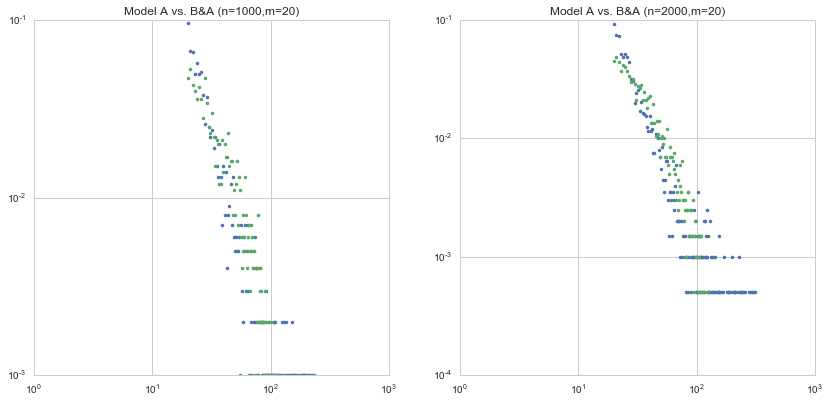

In [77]:
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.title("Model A vs. B&A (n=1000,m=20)")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(nx.barabasi_albert_graph(1000,20))),".")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(hw2_helper.random_graph_model_a(1000,20))),".")
plt.subplot(222)
plt.title("Model A vs. B&A (n=2000,m=20)")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(nx.barabasi_albert_graph(2000,20))),".")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(hw2_helper.random_graph_model_a(2000,20))),".")
plt.show()

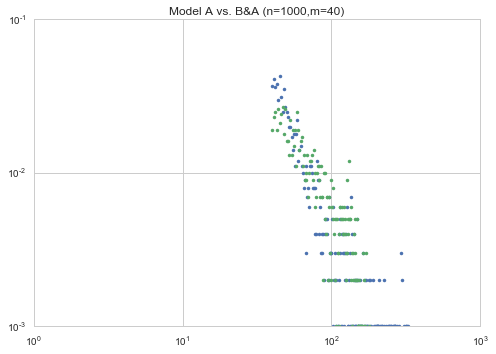

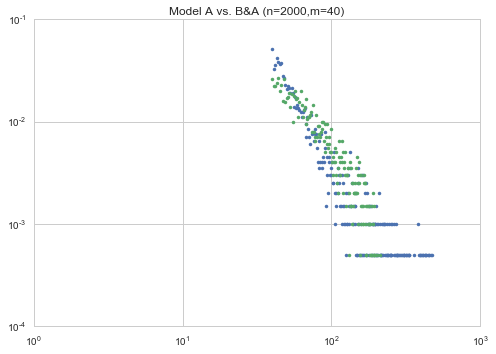

In [78]:
plt.figure(figsize=(14,14))
plt.figure(221)
plt.title("Model A vs. B&A (n=1000,m=40)")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(nx.barabasi_albert_graph(1000,40))),".")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(hw2_helper.random_graph_model_a(1000,40))),".")
plt.figure(222)
plt.title("Model A vs. B&A (n=2000,m=40)")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(nx.barabasi_albert_graph(2000,40))),".")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(hw2_helper.random_graph_model_a(2000,40))),".")
plt.show()

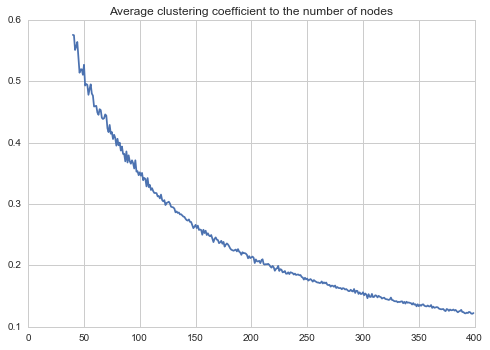

In [79]:
number_of_nodes = range(40,400)
average_clustering_coefficient = []
for n in number_of_nodes:
    average_clustering_coefficient.append(nx.average_clustering(hw2_helper.random_graph_model_a(n,20)))
plt.plot(number_of_nodes,average_clustering_coefficient)
plt.title("Average clustering coefficient to the number of nodes")

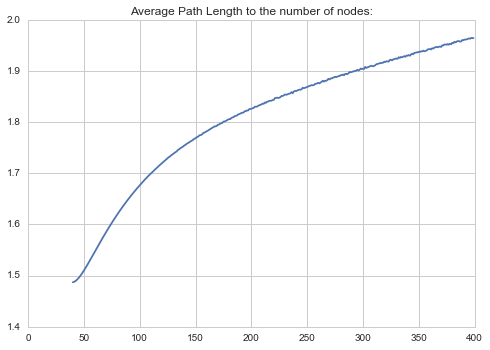

In [81]:
number_of_nodes = range(40,400)
average_path_length = []
for n in number_of_nodes:
    average_path_length.append(nx.average_shortest_path_length(hw2_helper.random_graph_model_a(n,20)))
plt.plot(number_of_nodes,average_path_length)
plt.title("Average Path Length to the number of nodes")

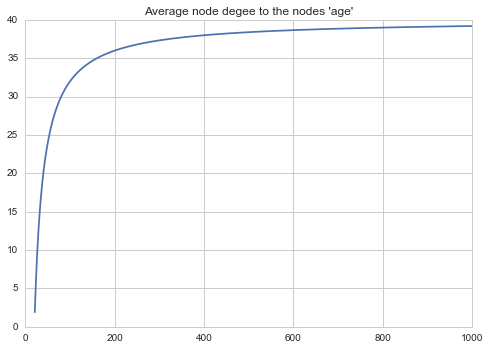

In [82]:
[iters, average_node_degree] = hw2_helper.random_graph_model_a_average_node_degree_on_iter(1000,20)
plt.plot(iters,average_node_degree)
plt.title("Average node degee to the nodes 'age'")

As we can see from the illustrations, in model A frequency of high degree nodes is less in compare with full A&B model, that indicates lack of hubs in the network and therefore confirms that model A does not holds power law and also does not have a scale free property.

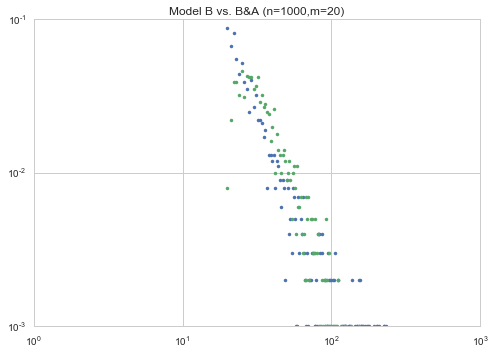

In [87]:
plt.figure()
plt.title("Model B vs. B&A (n=1000,m=20)")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(nx.barabasi_albert_graph(1000,20))),".")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(hw2_helper.random_graph_model_b(1000,20))),".")

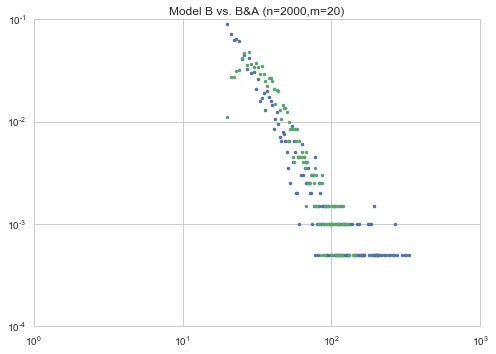

In [88]:
plt.figure()
plt.title("Model B vs. B&A (n=2000,m=20)")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(nx.barabasi_albert_graph(2000,20))),".")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(hw2_helper.random_graph_model_b(2000,20))),".")

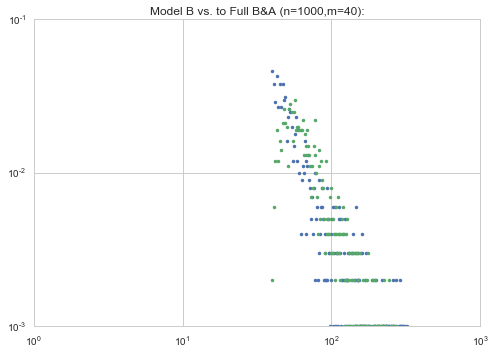

In [90]:
plt.figure()
plt.title("Model B vs. to Full B&A (n=1000,m=40):")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(nx.barabasi_albert_graph(1000,40))),".")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(hw2_helper.random_graph_model_b(1000,40))),".")

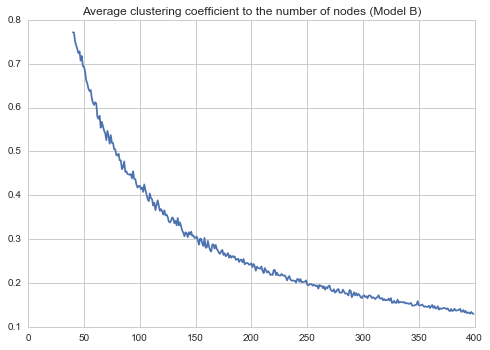

In [91]:
number_of_nodes = range(40,400)
average_clustering_coefficient = []
for n in number_of_nodes:
    average_clustering_coefficient.append(nx.average_clustering(hw2_helper.random_graph_model_b(n,20)))
plt.plot(number_of_nodes,average_clustering_coefficient)
plt.title("Average clustering coefficient to the number of nodes (Model B)")

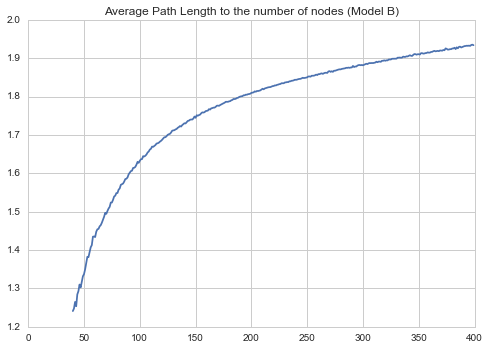

In [92]:
number_of_nodes = range(40,400)
average_path_length = []
for n in number_of_nodes:
    average_path_length.append(nx.average_shortest_path_length(hw2_helper.random_graph_model_b(n,20)))
plt.plot(number_of_nodes,average_path_length)
plt.title("Average Path Length to the number of nodes (Model B)")

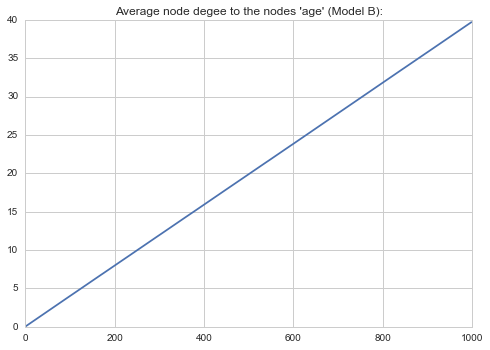

In [98]:
[iters, average_node_degree] = hw2_helper.random_graph_model_b_average_node_degree_on_iter(1000,20)
plt.plot(iters,average_node_degree)
plt.title("Average node degee to the nodes 'age' (Model B):")

As we can see from illustrations of model B networks, PDFs of this networks are peaked so model B does not holds a power law and does not have scale free property.

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings

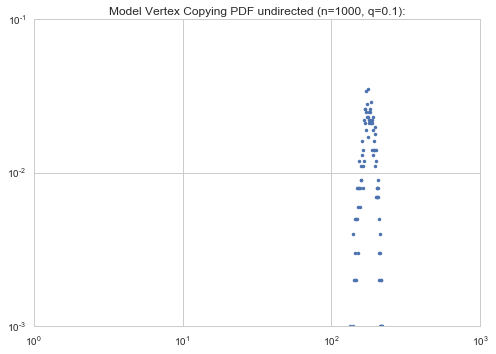

In [99]:
plt.figure()
plt.title("Model Vertex Copying PDF undirected (n=1000, q=0.1):")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(hw2_helper.random_graph_vertex_copying_model(1000, 0.1))),".")

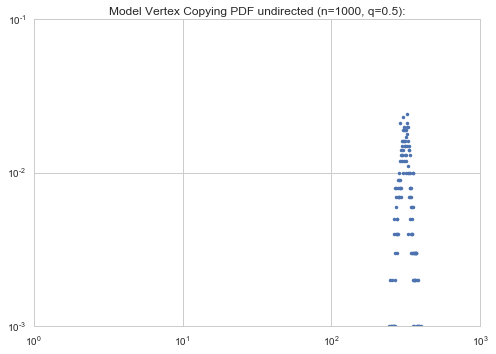

In [100]:
plt.figure()
plt.title("Model Vertex Copying PDF undirected (n=1000, q=0.5):")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(hw2_helper.random_graph_vertex_copying_model(1000, 0.5))), ".")

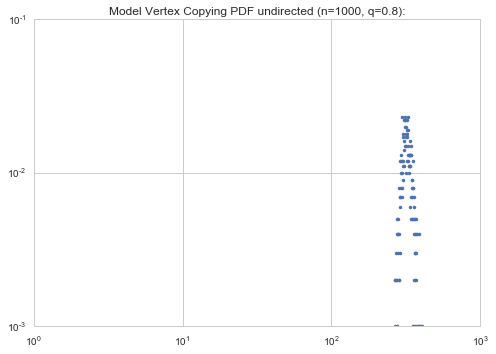

In [101]:
plt.figure()
plt.title("Model Vertex Copying PDF undirected (n=1000, q=0.8):")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(hw2_helper.random_graph_vertex_copying_model(1000, 0.5))), ".")

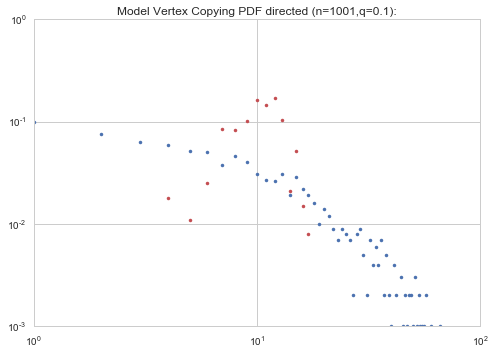

In [103]:
plt.figure()
plt.title("Model Vertex Copying PDF directed (n=1001,q=0.1):")
g = hw2_helper.random_graph_vertex_copying_model(1000, 0.1, is_directed=True)
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(g, direction="in")), ".")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(g, direction="out")), "r.")

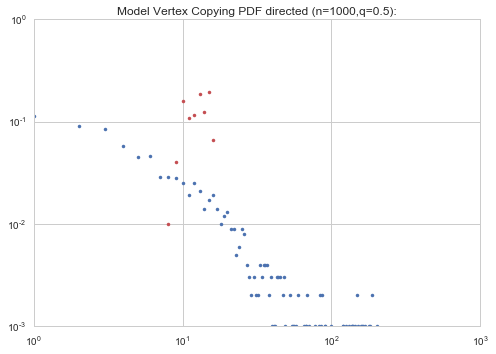

In [104]:
plt.figure()
plt.title("Model Vertex Copying PDF directed (n=1000,q=0.5):")
g = hw2_helper.random_graph_vertex_copying_model(1000, 0.5, is_directed=True)
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(g, direction="in")), ".")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(g, direction="out")), "r.")

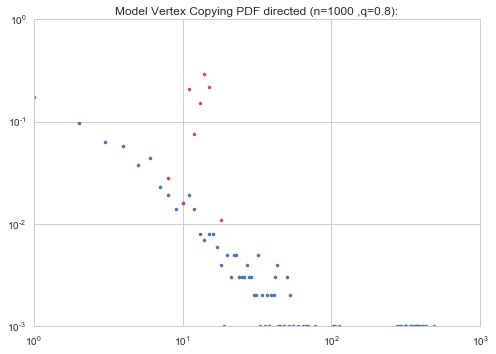

In [105]:
plt.figure()
plt.title("Model Vertex Copying PDF directed (n=1000 ,q=0.8):")
g = hw2_helper.random_graph_vertex_copying_model(1000 ,0.8, is_directed=True)
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(g, direction="in")), ".")
plt.loglog(hw2_helper.get_pdf(hw2_helper.get_node_degrees(g, direction="out")), "r.")

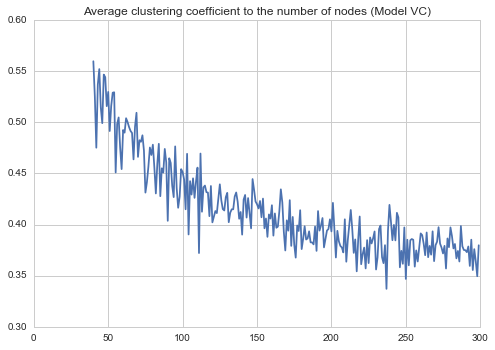

In [106]:
number_of_nodes = range(40,300)
average_clustering_coefficient = []
for n in number_of_nodes:
    average_clustering_coefficient.append(nx.average_clustering(
            hw2_helper.random_graph_vertex_copying_model(n, 0.5)
        ))
plt.plot(number_of_nodes,average_clustering_coefficient)
plt.title("Average clustering coefficient to the number of nodes (Model VC)")

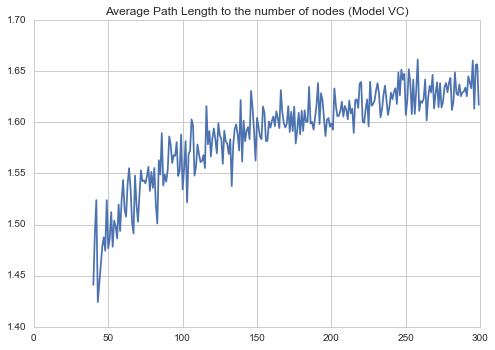

In [109]:
number_of_nodes = range(40,300)
average_path_length = []
for n in number_of_nodes:
    average_path_length.append(nx.average_shortest_path_length(
            hw2_helper.random_graph_vertex_copying_model(n, 0.5)
        ))
plt.plot(number_of_nodes,average_path_length)
plt.title("Average Path Length to the number of nodes (Model VC)")

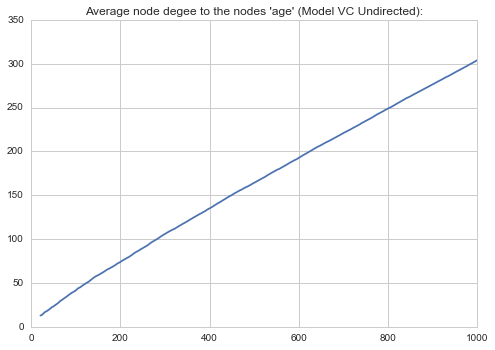

In [110]:
[iters, average_node_degree] = hw2_helper.random_graph_vertex_copying_model_average_node_degree_on_iter(1000, 0.5)
plt.plot(iters,average_node_degree)
plt.title("Average node degee to the nodes 'age' (Model VC Undirected):")

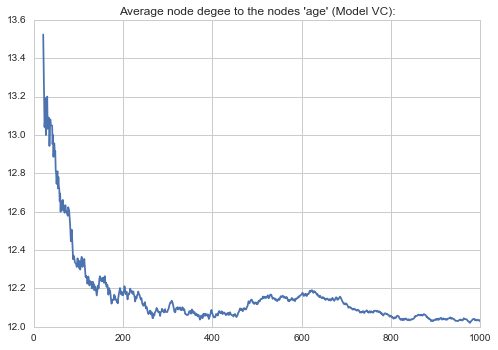

In [111]:
[iters, average_node_degree] = hw2_helper.random_graph_vertex_copying_model_average_node_degree_on_iter(1000, 
                                                                                                        0.5, 
                                                                                                        is_directed=True,direction="in")
plt.plot(iters,average_node_degree)
plt.title("Average node degee to the nodes 'age' (Model VC):")

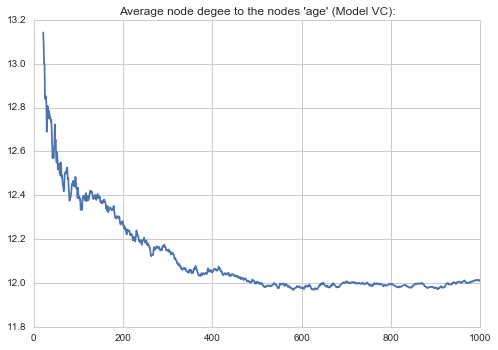

In [112]:
[iters, average_node_degree] = hw2_helper.random_graph_vertex_copying_model_average_node_degree_on_iter(1000, 
                                                                                                        0.5, 
                                                                                                        is_directed=True,direction="out")
plt.plot(iters,average_node_degree)
plt.title("Average node degee to the nodes 'age' (Model VC):")